# Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif,mutual_info_classif
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import graphviz
from IPython.display import Image
import random
from sklearn.model_selection import cross_val_score
random.seed(123)

## Decission Tree model comparison using different techniques:

### 1. Brute Model
### 2. Regularization
### 3. Feature Selection
### 4. Random Forest
### 5. Adaboost

In [2]:
# Importación de datos desde csv usando librería pandas
cancer=pd.read_csv("C:/Users/javier.cuadra/Documents/Datasets/Cancer/cancer.csv")
cancer.head(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst,class
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,malignant
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,malignant
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,malignant
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,malignant
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,malignant
5,0.258839,0.202570,0.267984,0.141506,0.678613,0.461996,0.369728,0.402038,0.518687,0.551179,...,0.312633,0.263908,0.136748,0.712739,0.482784,0.427716,0.598282,0.477035,0.454939,malignant
6,0.533343,0.347311,0.523875,0.380276,0.379164,0.274891,0.264058,0.367793,0.370707,0.157119,...,0.416844,0.511928,0.349194,0.482269,0.223448,0.302236,0.663918,0.295289,0.187853,malignant
7,0.318472,0.376057,0.320710,0.184263,0.598267,0.445126,0.219447,0.297465,0.573737,0.517060,...,0.429638,0.299766,0.174941,0.622268,0.330753,0.213898,0.534708,0.321506,0.393939,malignant
8,0.284869,0.409537,0.302052,0.159618,0.674099,0.533157,0.435567,0.464861,0.651515,0.504002,...,0.498667,0.277852,0.136183,0.654626,0.497531,0.430511,0.707904,0.554504,0.342123,malignant
9,0.259312,0.484613,0.277659,0.140997,0.595558,0.675480,0.532568,0.424602,0.489899,0.683867,...,0.763859,0.235271,0.129326,0.753682,1.000000,0.882588,0.759450,0.552139,1.000000,malignant


### Check common statistics and possible missing values


In [3]:
cancer.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
cancer.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave.points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave.points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave.points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
class                      0
dtype: int64

### The variables are standarized (all values from all variables are in the same scale, between 0 and 1, still this will not have an impact in a decission tree) and there are not missing values. Next let's try to build a predictive model with all 30 variables.

In [5]:
#Train-Test Split, the default values for sk library are 0.75 (train) and 0.25(test)
X=cancer.drop(columns=["class"])
Y=cancer["class"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


### SK Learn allows to build regression and classification models using decission trees. We are trying to predict a binary class (if the cancer detected is malignant or benign), let's build a classification tree

In [6]:
model_cancer=tree.DecisionTreeClassifier(random_state=0)
model_train=model_cancer.fit(X_train, Y_train)
Y_pred=model_train.predict(X_test)
Acc=accuracy_score(Y_test,Y_pred)*100
print("Accuracy: "+str(Acc))

Accuracy: 88.11188811188812


In [7]:
dot_data = tree.export_graphviz(model_train,out_file="tree1.dot",feature_names=X_train.columns)

### We obtained an accuracy of the 88% over the test set. Let's visualize the tree and check some values in order to make improvals

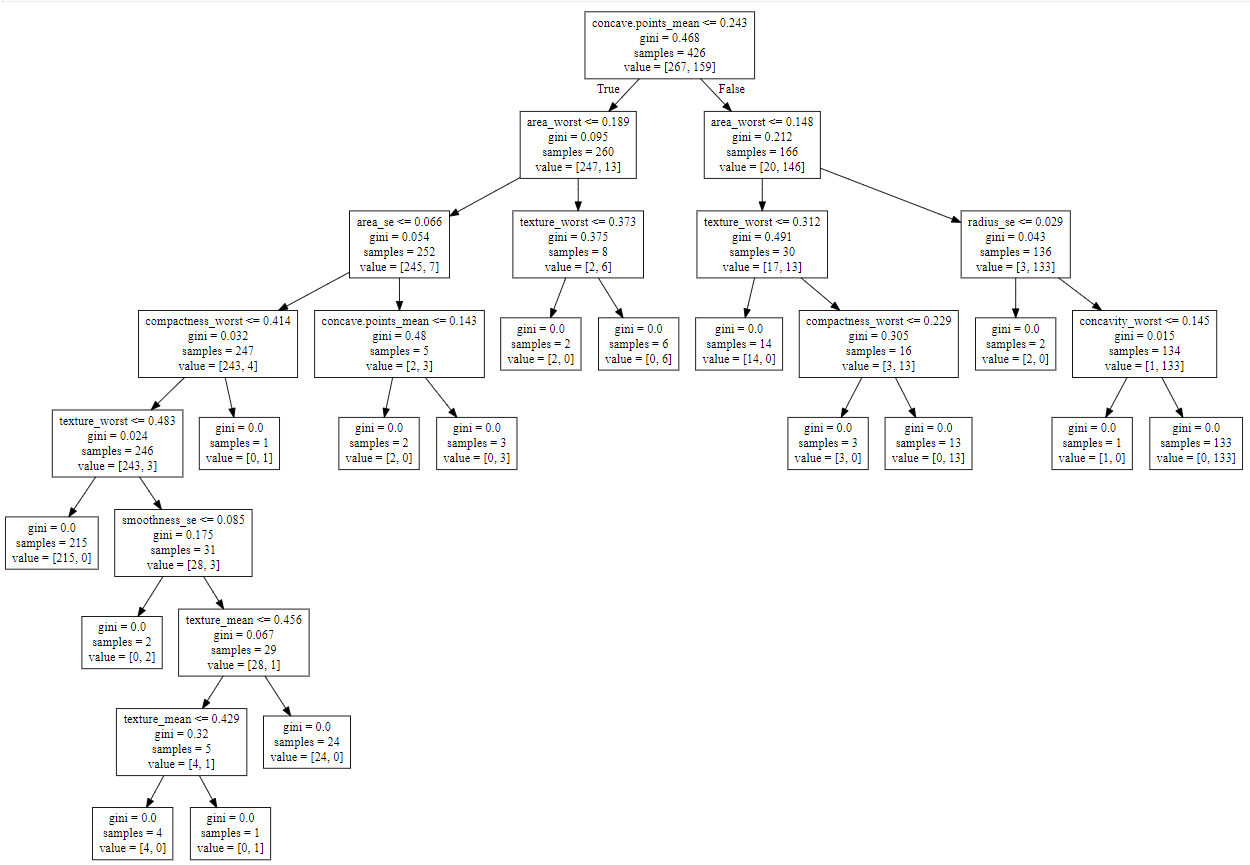

In [8]:
Image(filename="Model1_pic.png") 

### After visualizing the model it is possible to notice that there are leaves in which there are not many samples. This is a clear sign of overfitting in a decission tree. Let's consider a possible improval to the model retaining the depth of the tree setting a minimum number of samples in each leaf of 10. 

In [9]:
model_cancer=tree.DecisionTreeClassifier(random_state=0,min_samples_leaf=10)
model_train=model_cancer.fit(X_train, Y_train)
Y_pred=model_train.predict(X_test)
Acc=accuracy_score(Y_test,Y_pred)*100
print("Accuracy: "+str(Acc))

Accuracy: 93.7062937062937


### The action taken have pruned those nodes of the tree with less than 10 samples contained. This have made our model simpler and had a regularization effect (which reduces overfitting). We can check this statement visualizing the decission tree.

In [10]:
dot_data = tree.export_graphviz(model_train,out_file="tree2.dot",feature_names=X.columns)

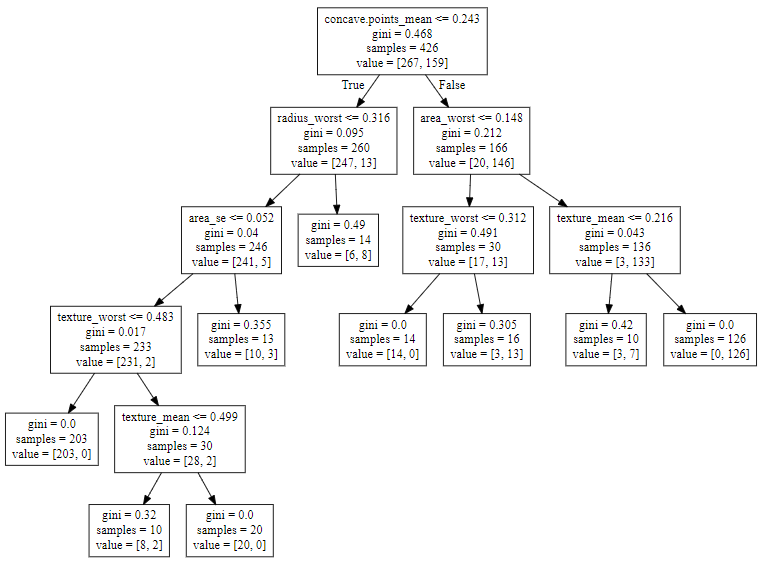

In [11]:
Image(filename="Model2_pic.png") 

### In order to keep improving our model we will apply a feature selection strategy. SKLearn has implemented a different kind of feature selection methods.  Usually it is possible to classify this methods in three categories:

### 1. Wrapper Methods: Train the algorythm on the original data and select features based on the performance obtained.

### 2. Filter Methods: Consider statistical charecteristics of the original data and made the selection based on them.

### 3. Embedded Methods: Which made feature selection a part of the model construction process.

### In our case we will use a filter method known as Mutual Information. 

In [12]:
mutual_selector = SelectKBest(mutual_info_classif,k=10)
selection = mutual_selector.fit(X,Y)
idxs_selected = mutual_selector.get_support(indices=True)
X_features = X[X.columns[idxs_selected]]
print(X_features.shape)
X_train,X_test,Y_train,Y_test=train_test_split(X_features,Y,random_state=0)
print("Features Selected: " + str(X_features.columns))

(569, 10)
Features Selected: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave.points_mean', 'area_se', 'radius_worst', 'perimeter_worst',
       'area_worst', 'concave.points_worst'],
      dtype='object')


### As it is shown 10 features are selected, let's check if this has improved our model accuracy.

In [13]:
model_cancer=tree.DecisionTreeClassifier(random_state=0,min_samples_leaf=10)
model_train=model_cancer.fit(X_train, Y_train)
Y_pred=model_train.predict(X_test)
Acc=accuracy_score(Y_test,Y_pred)*100
print("Accuracy: "+str(Acc))

Accuracy: 95.8041958041958


### Our accuracy has raised again as expected. Feature selection methods are powerful tools which allow to reduce an oversized feature space. Still, selecting the most appropriate method for each dataset is a hard job which include iterating through the different possibilities and compare the result obtained.

### As the last step of this process let's visualize the tree obtained through this technique.

In [14]:
dot_data = tree.export_graphviz(model_train,out_file="tree3.dot",feature_names=X_features.columns)


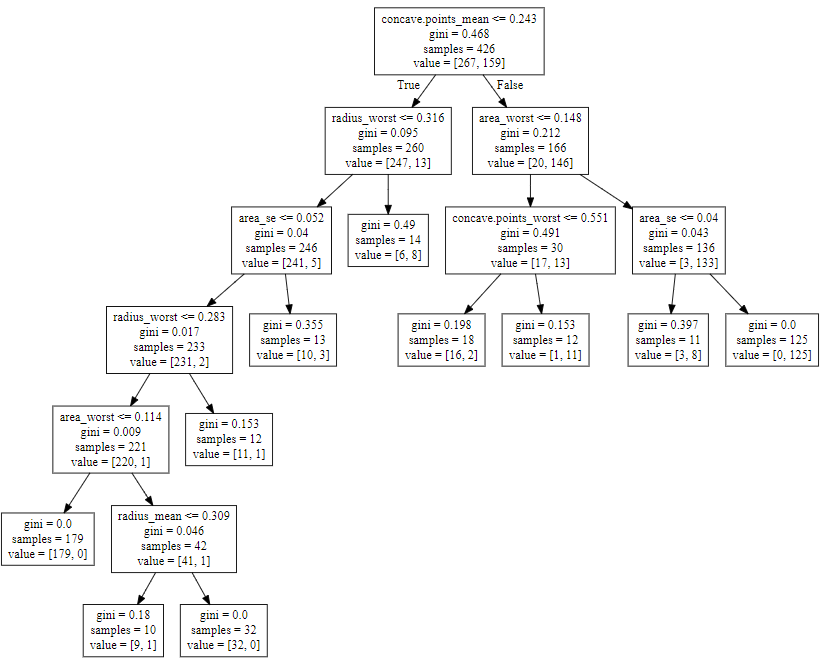

In [15]:
Image(filename="Model3_pic.png") 

### Until this point we have improved the performance of our model using two differents approaches. First we have reduced the overfitting of our model limiting the minimum number of samples in a node ,this made our model simpler and had a regularization effect on it. Later, we have reduced our oversized feature space using a mutual information criteria. This have allowed our model to improve its performance to an accuracy of 95,80%.

### For the next iteration we are going to go back to the start point and try a bagging technique called Random Forest. Random Forest will generate a group of decission trees, each of them with different strengths and weaknesses. The main idea behind this algorythm is to let the strength and weaknesses of the different models compensate each other and reach a more accurate prediction.

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0)
random_forest=RandomForestClassifier(random_state=0,n_estimators=20,max_features=5,min_samples_leaf=10)
random_forest=random_forest.fit(X_train, Y_train)
Y_pred=random_forest.predict(X_test)
Acc=accuracy_score(Y_test,Y_pred)*100
print("Accuracy: "+str(Acc))

Accuracy: 97.9020979020979


### As it is shown the prediction made by the group of models is more accurate than the one made by our best model. There is still some considerations that need to be made.

### Until this point the hyperparameters of the models have been chosen arbitrarily and thorugh a visual inspection of our trees (for example the minimum number of samples per node). Tuning hyperparameters is an important part of modeling. We will iterate through hyperparameters and perform a crossvalidation model selection in the boosting method step, a similar approach could be applied to obtain a better random forest model.

### Let's visualize some of the trees obtained for our random forest estimator.

In [17]:
dot_data = tree.export_graphviz(random_forest.estimators_[0],out_file="randomforest.dot",feature_names=X_train.columns)
dot_data = tree.export_graphviz(random_forest.estimators_[1],out_file="randomforest2.dot",feature_names=X_train.columns)
dot_data = tree.export_graphviz(random_forest.estimators_[2],out_file="randomforest3.dot",feature_names=X_train.columns)

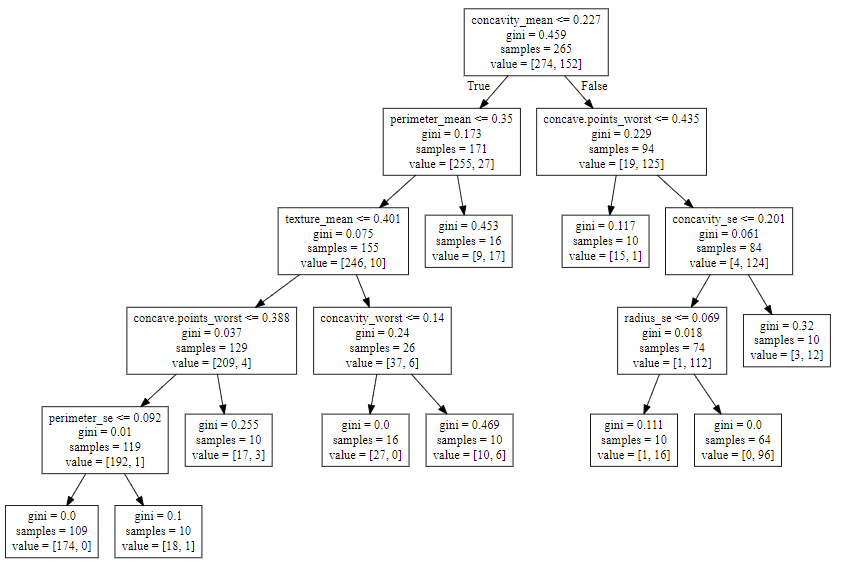

In [18]:
Image(filename="Random1.png")

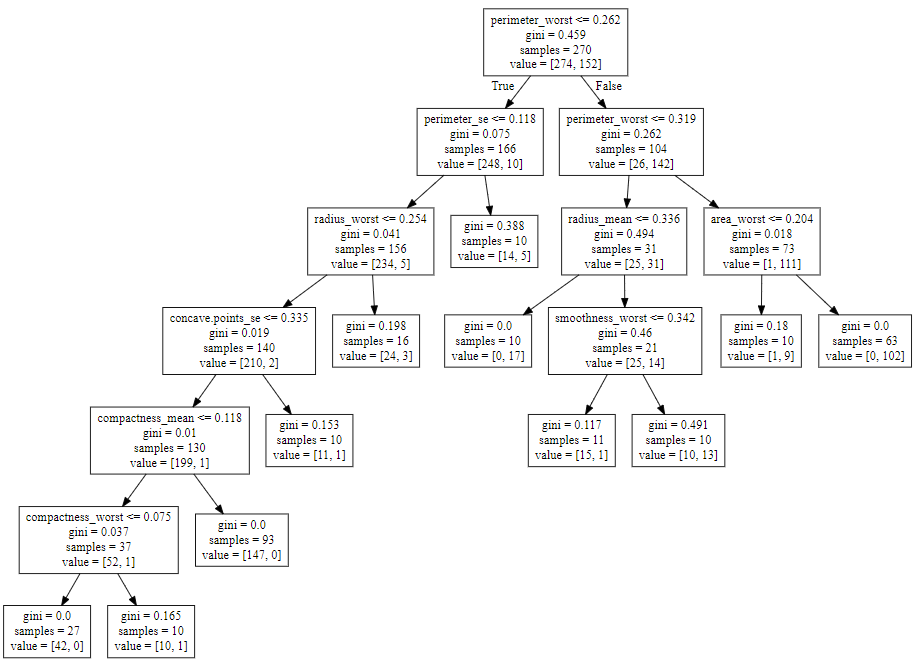

In [19]:
Image(filename="Random2.png")

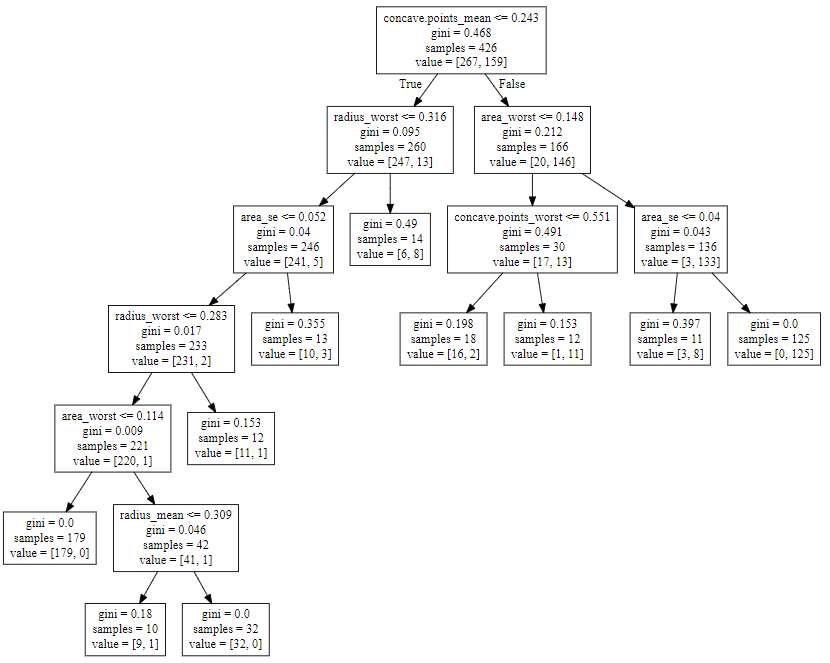

In [20]:
Image(filename="Random3.png")

### Finally, we will implemente one last technique using a boosting method. Boosting method are also an ensamble technique, they differ from bagging techniques in the way they are trained. Boosting models are trained sequentially and they put speccial attention in the error commited, in the following iterations the different models try to compensate the error and reach an higher accuracy. To obtain a successfull Boosting Model it is necessary to tune the hyperparameters.

### For our exercise we will apply AdaBoost, a specially accurate method for binary classification problems.

### We will try to find the optimal number of estimators and learning rate iterating and performing a crossvalidation model selection. 

In [21]:
All_Acc=np.empty([9,29])
Acc=np.empty([29])
j=0
for est in range(100,1000,100):
    i=0
    for mu in range(1,30,1):
        adaboost=AdaBoostClassifier(random_state=0,n_estimators=est,learning_rate=mu/10)
        adaboost=adaboost.fit(X_train, Y_train)
        scores=cross_val_score(adaboost, X, Y, cv=5)
        Acc[i]=scores.mean()
        i+=1
    All_Acc[j,:]=Acc
    j+=1

In [22]:
columns_acc=np.arange(0.1,3,0.1)
rows_acc=np.arange(100,1000,100)
rows=np.arange(100,1000,100)
Acc_DF=pd.DataFrame(All_Acc*100,index=rows_acc,columns=columns_acc)
pairs = Acc_DF.unstack()
pairs_order = pairs.sort_values(ascending=False)
print("Learning Rate + Number of Estimators + Mean of Accuracies: " + str(pairs_order))

Learning Rate + Number of Estimators + Mean of Accuracies: 1.6  500    98.422470
1.4  600    98.422470
1.6  600    98.422470
1.8  600    98.251635
1.4  300    98.248557
1.6  800    98.248557
0.8  800    98.245479
1.9  700    98.245479
1.6  400    98.245479
1.8  500    98.077722
1.4  900    98.074644
1.6  900    98.074644
1.4  700    98.074644
     500    98.071566
1.2  600    98.071566
1.4  800    98.071566
1.9  900    98.071566
1.1  200    98.071566
1.6  300    98.071566
     700    98.071566
1.3  500    98.071566
1.8  400    97.903809
1.3  900    97.900731
     700    97.900731
0.6  300    97.900731
0.7  600    97.900731
1.3  600    97.900731
1.1  400    97.900731
1.2  700    97.900731
1.1  600    97.900731
              ...    
2.1  700    18.194690
2.8  100    16.632551
2.6  100    16.284725
2.2  700    11.244325
2.3  200    11.244325
     100    11.244325
2.2  900    11.244325
     800    11.244325
     600    11.244325
2.3  400    11.244325
2.2  500    11.244325
     400    11.24

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002013191A320>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

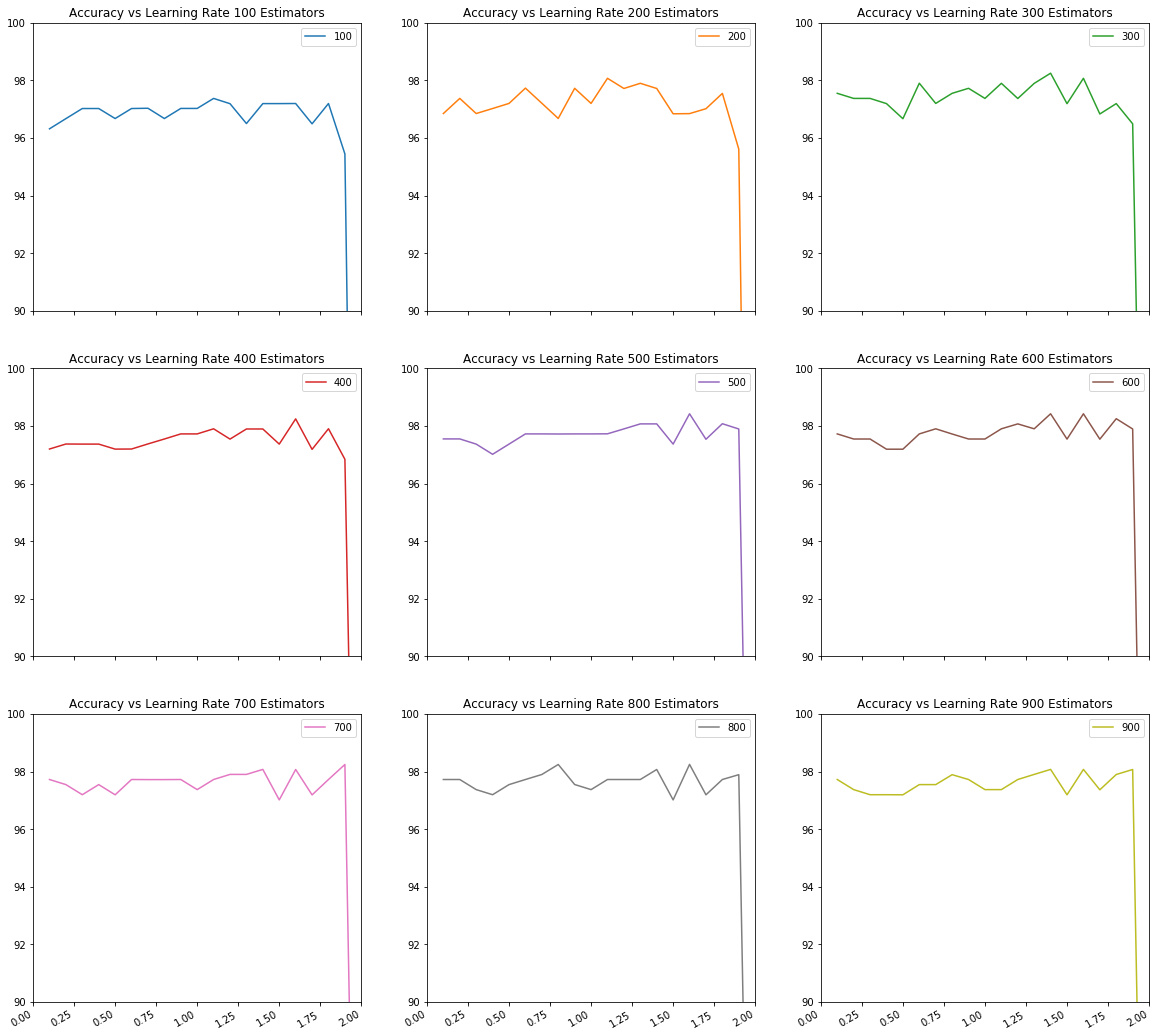

In [24]:
ACC_T=Acc_DF.T
fig=plt.figure()
titles=["Accuracy vs Learning Rate 100 Estimators","Accuracy vs Learning Rate 200 Estimators",
        "Accuracy vs Learning Rate 300 Estimators","Accuracy vs Learning Rate 400 Estimators","Accuracy vs Learning Rate 500 Estimators",
       "Accuracy vs Learning Rate 600 Estimators","Accuracy vs Learning Rate 700 Estimators","Accuracy vs Learning Rate 800 Estimators",
       "Accuracy vs Learning Rate 900 Estimators",]
ACC_T.plot(subplots=True,layout=(3, 3),figsize=(20,20), ylim=[90,100],xlim=[0,2],title=titles)